# Basics

1. `python -m venv ["name of the virtual env"]`
2. `./["name of venv"]/Scripts/activate`
3. `pip install/show django`
4. `django-admin startproject ["project name"]`
5. `python manage.py startapp ["app name"]`
6. `python manage.py makemigrations`
7. `python manage.py migrate`
8. `python manage.py shell`

---

- `pip install python-decouple` (its a library to handle .env variables easily, nothing special)
- `pip install psycopg2-binary` (if working with postgresql, its for connecting django to postgresql, assuming you are using postgresql locally)
- btw, if using postgresql, you can just open the pgAdmin and make the DB there

---


1. **init**.py is to make the directory a python package
2. asgi.py is for async functionality (Asynchronous Server Gateway Interface)
3. settings.py is where we do the DB connection and have our app dependencies (installed apps)
4. urls.py is where we add the new routes and we link those routes/endpoints to views or django apps
5. wsgi.py is not ganna be edited much, its for sync functionality unlike asgi. this is traditional django (django is a sync framework, fastapi is an async framework)
6. manage.py is the file we use to run the main commands like runserver or makemigrations etc. We won't be editing it much.

---


- you will come across class Meta a bunch, its a convention in django to use it with serializers or models etc, its for configuring class behavior, as in "here are the config for this serializer/model"


---

# Models

- using the django ORM to make tables
- see the images below for the code details for models
- know the following about indexing:
  - Indexes speed up reads (searches, filters) but slow down writes (inserts, updates, deletes) because indexes must be updated each time data changes.
  - Indexes consume disk space.
  - Indexes are most beneficial on columns used frequently in queries (WHERE, JOIN, ORDER BY).
  - Indexing every column would cause unnecessary overhead and degrade overall performance.
  - So, index selectively on columns that matter for search/filter performance.


- 
---

# Serializers

- Serializers in Django REST Framework (DRF) are classes that convert complex Django model instances into native Python data types that can then be easily rendered into JSON, XML, or other content types. They also handle deserialization - converting parsed data back into complex types.
- Why do we need them?

  - Data Transformation: Convert Django model objects to JSON format for API responses
  - Validation: Validate incoming data before saving to database
  - Security: Control which fields are exposed in API responses
  - Customization: Add computed fields, format data, nested relationships

- Would we need them without React?

  - If you were using Django templates (server-side rendering), you wouldn't need serializers because:

    - Django templates work directly with model instances
    - No JSON conversion needed
    - Data is processed server-side

- But with React (or any frontend framework), you need serializers because:

  - React needs JSON data from APIs
  - API endpoints must return structured data
  - Frontend and backend communicate via HTTP requests


- just think that we have API-based and template-based applications. the API based ones will certainly require serializers whereas if you use django templates, that won't require the serializers

---

- we import serializers from rest_framework
- we then inherit serializers.ModelSerializers in our serializer class
- For GET requests: It converts Client objects from the database into JSON (Client is the model we are using)
- For POST requests: It validates incoming JSON and converts it to Client objects

---

# APIs/Views

- we will use the django rest framework
  - `pip install djangorestframework`
  - in settings.py: add 'rest_framework' to the INSTALLED_APPS list
  - now make a serializer for your model/table
  - then go to views.py and use the model and serializer there
  - We will write the ORM queries here to query the DB

---




# CRUD

- for basic operations, the rest_framework has something called generics which have something called mixins
  - ListModelMixin: Implements GET for collections (list of objects)
  - CreateModelMixin: Implements POST for creating objects
  - RetrieveModelMixin: Implements GET for a single object
  - UpdateModelMixin: Implements PUT/PATCH for updating objects
  - DestroyModelMixin: Implements DELETE for removing objects
  - ListCreateAPIView combines the List and Create mixins with a base view class, giving you both GET and POST functionality.
- you can simply import generics and then the view class can inherit generics.ListCreateAPIView (or other mixins)
- here is an example of a GET+POST request view using mixins:

In [ ]:
from rest_framework import generics
from .serializers import ClientSerializer
from .models import Client
# Create your views here.


class ClientListCreate(generics.ListCreateAPIView):
    queryset = Client.objects.all()
    serializer_class = ClientSerializer

- the generics.ListCreateAPIView read the request that comes from react, sees if its a GET or a POST request. if it is a GET then:
  - it has access to the Client model and it will the ORM can convert that Client.objects.all() to select * from Client and query the db and return all the rows
  - the view also has access to the serializer which will convert the data to json and send it back to react as a response
- if its a post request
  - it would first use the serializer to convert the incoming json into a django/model object, and then it would add a row into the DB using the ORM


---

# Apps and Urls

- `python manage.py startapp <app_name>` to create a django app
- put the name of the app in settings.py in the INSTALLED_APPS list
- in the urls.py of the project folder:
  - path('api/', include('clients.urls')),
  - api/ is the route after which the app routes will work. so say, in your app you have a route called clients. it would correlate to api/clients
- now go to the app folder and make a urls.py file there as well:
  - you will have another urlpatterns list here where you will use the path function and link an endpoint to a view
  - eg: path('clients/', views.ClientListCreate.as_view(), name='client-list-create')
  - this will link the clients/ endpoint to the ClientListCreate view


---

# Postgresql




---

# models.py Terminology

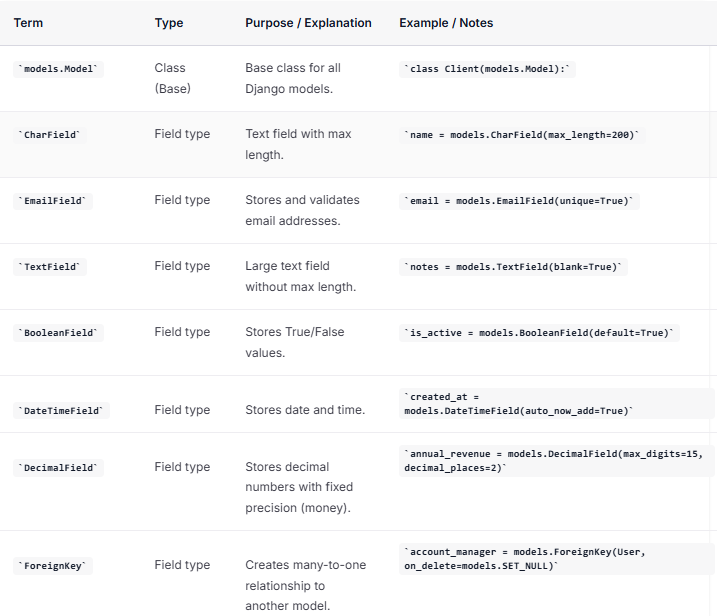

---

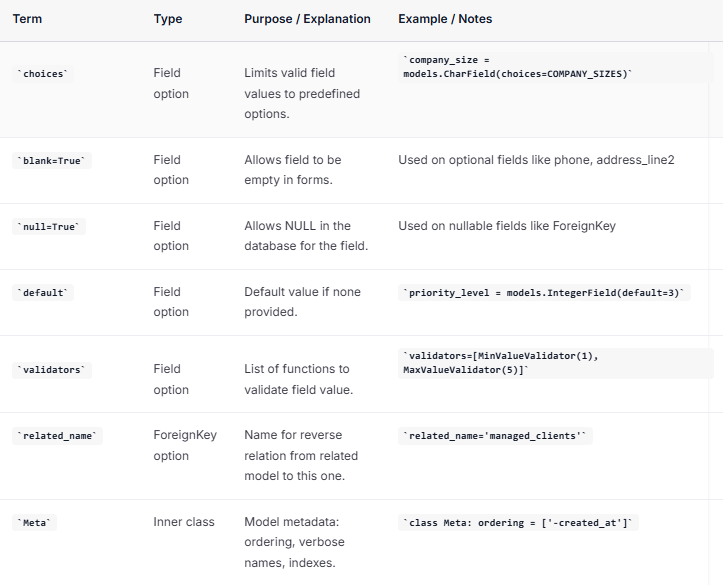

---

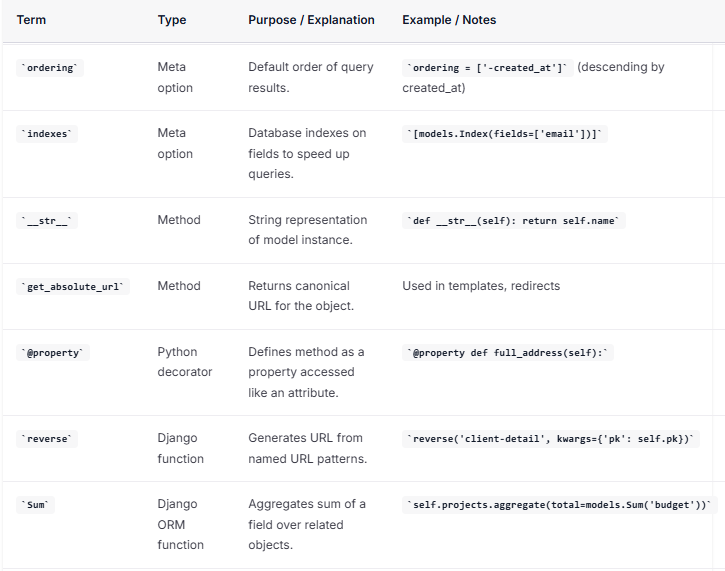

---

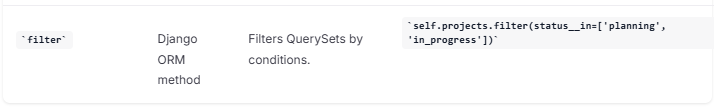


---


---

# Django's Admin Functionality



---

# Linking React

- make a folder for the frontend alongside the venv and the django directory
- hit the normal `npm create vite@latest --template projectName`
- the public folder is for static assets just like it was in next.js
- src/assets will contain files and images that need to be preprocessed by some build tool and then served
- app.tsx is basically the main component of the app
- main.tsx is where we are importing app.tsx and rendering things, its the landing page basically
- package.json is just a list of dependencies like npm start or npm build
- the tsconfig are typescript config files and vite.config is a vite config file
- git is initialized by default so just do: rmdir /s /q react_frontend\.git to delete the .git folder and delete anything else too like .gitignore etc (cz git should be initialized at the root directory so it encloses both django and react, not just react)
- you can make a pages folder in src and a components folder as well in src and thats where you can store your pages and component


---


# Tailwind Setup

- you can run `npm install -D tailwindcss postcss autoprefixer` and then `npx tailwindcss init -p` to use tailwind css in React
- make 2 files: tailwind.config.js and postcss.config.js
- paste the following code in tailwind.config.js:

In [ ]:
/** @type {import('tailwindcss').Config} */
export default {
  content: [
    "./index.html",
    "./src/**/*.{js,ts,jsx,tsx}",
  ],
  theme: {
    extend: {},
  },
  plugins: [],
}

- run `npm install -D @tailwindcss/postcss`
- go into postcss.config.js now:


In [ ]:
export default {
  plugins: {
    '@tailwindcss/postcss': {},
    autoprefixer: {},
  },
}

- go into src/index.css and add the following


In [ ]:
// src/index.css
@tailwind base;
@tailwind components;
@tailwind utilities;

---

- the above approach might not work because:

- current stable tailwind verion is 3.4.0 so use:
    - `npm install -D tailwindcss@^3.4.0 postcss autoprefixer`
    - `npx tailwindcss init -p`
    - and uninstall postcss if you do this:
      - `npm uninstall @tailwindcss/postcss`

and the postcss.config.js for this will be:

In [ ]:
export default {
  plugins: {
    tailwindcss: {},
    autoprefixer: {},
  },
}

---

# Cors-Headers

- React is on a different server (using vite: port 5173 and django is on port 8000. so we need to enable communication across diff port). so we need:
- `pip install django-cors-headers`
- add it to INSTALLED-APPS = ["corsheaders"]
- add this to MIDDLEWARE = ["corsheaders.middleware.CorsMiddleware"]
- and then:
  - CORS_ALLOWED_ORIGINS = [
    "http://localhost:3000",
]
  - 5173 for vite, 3000 for create-react-app


---

# Fetch function in react/js

---

# defining requests

- the data type flow in a request would work something like this:
    - PostgreSQL stores rows in its binary format.
    - Django queries PostgreSQL into Python objects (e.g., lists/dicts).
    - Django serializes those Python objects to JSON text.
    - React receives the raw text and uses response.json() to convert it back to a JavaScript object.


## GET

- for a simple GET request, we don't need a request body, all we need to do is use the fetch function and then use the .then with a call back, like this: 

In [ ]:
useEffect(() => {
    fetch('http://localhost:8000/api/clients')
        .then(response => response.json())
        .then(data => {
            setClients(data);
            setLoading(false);
        })
}, []);



## POST


- for POST requests, we will explicitly define the function body. the body will have 3 things, the method, the header, and the body (the form data that we will pass that we want to insert into the db basically). here is what a POST request would look like:

In [ ]:
const handleSubmit = (e: React.FormEvent<HTMLFormElement>) => {
    e.preventDefault();
    fetch('http://localhost:8000/api/clients/', {
        method: 'POST',
        headers: {'Content-Type': 'application/json'},
        body: JSON.stringify(data), 
        // the method is POST because we are sending data to the server
        // the headers are set to application/json because we are sending JSON data
        // the body is the data that we are sending to the server
    })
    .then((response) => {
        if (!response.ok) {
            throw new Error('Network response was not ok');
        }
        return response.json();
        })
        .then((newClient: Client) => {
            setClients([...clients, newClient]);
            setData({name: '',email: '',phone: '',company: ''});
        })
        .catch((error: Error) => {
            alert(`There was a problem with the fetch operation: ${error.message}`);
            console.error(`There was a problem with the fetch operation: ${error}`);
        })
    }


## PUT/PATCH

---

## DELETE

---

# ChatBot Frontend (Responsive)

---

# Random React Tips


- if you need icons, you can use react-icon library, there is an fi as well as an fa variant

```typescript
import { FiSearch, FiEdit, FiMessageSquare, FiSettings, FiFileText } from 'react-icons/fi';
```

- if you have a bunch of white space that you wanna cover inside of a flex box, you can make a flex item div and set it to flex-grow

```html
<div className='flex-grow'></div>
```

- if you want any kind of toggle effect on a button (say a popup div appears if you click a button and then vanishes when you click the button again, just use useState and some conditional jsx/tsx).
- the conditional tsx would be something like: {isOpen ? (tsx here if it is Open) : (tsx here if it isn't open)}
- if you have a relative parent and an absolute child and the goal is to make a pop up appear right below the parent (the absolute div appear exactly below the parent) then keep these 2 tailwind classes in mind:
    - top-full positions an element’s top edge at 100% relative to its parent’s top edge (i.e., directly below the parent).
    - left-0 positions the element’s left edge at 0 relative to its parent’s left edge (i.e., pinned to the left side).

---

- typescript needs explicit data types unlike javascript so if we are accepting props in a component, we should first make an interface and assign that interface to the props like this:

```typescript
interface NavBarProps {
    user_initials: string;
}

export default function Navbar( {user_initials}: NavBarProps) {
```

- now you can easily use this in the tsx where ever you want

---


- if you want a simple navbar with 3 elements, one on the left, one on the end, and one in the center, just simply use justify-between instead of using flex-end etc

---